In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV , KFold , train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


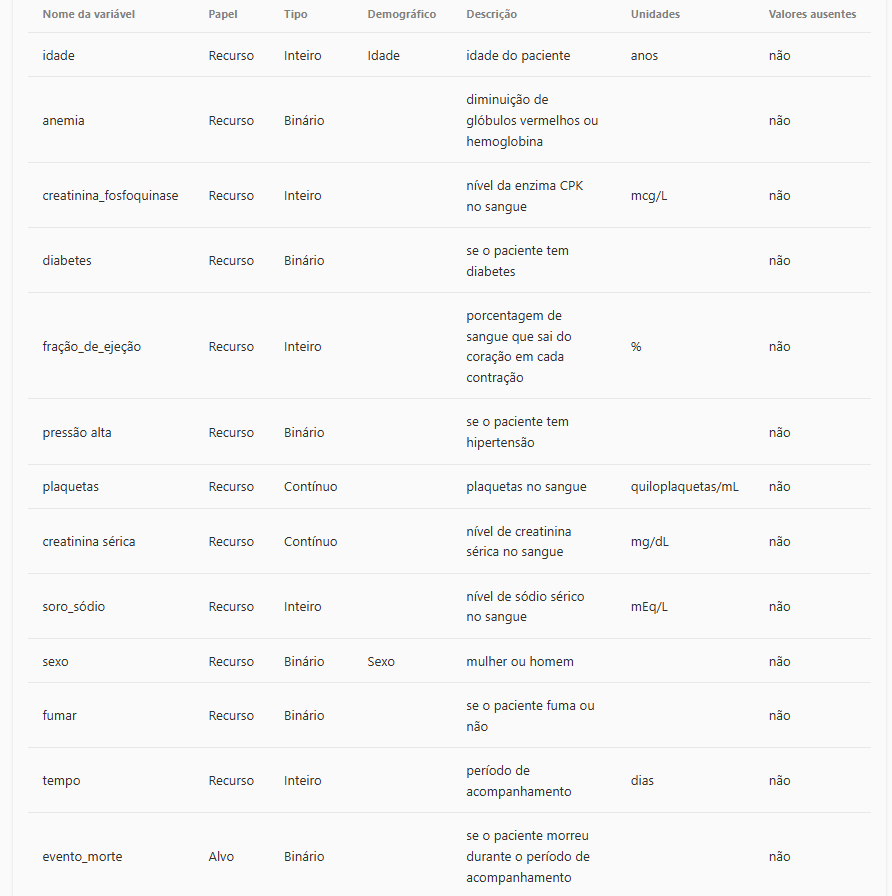

# Etapa para analise dos dados

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')
pd.DataFrame(dados)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
dados.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
dados.mean(numeric_only=True)

,0
age,60.833893
anaemia,0.431438
creatinine_phosphokinase,581.839465
diabetes,0.418060
ejection_fraction,38.083612
high_blood_pressure,0.351171
platelets,263358.029264
serum_creatinine,1.393880
serum_sodium,136.625418
sex,0.648829


In [ ]:
dados.median(numeric_only=True)

,0
age,60.0
anaemia,0.0
creatinine_phosphokinase,250.0
diabetes,0.0
ejection_fraction,38.0
high_blood_pressure,0.0
platelets,262000.0
serum_creatinine,1.1
serum_sodium,137.0
sex,1.0


In [ ]:
dados.value_counts()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
95.0  1        371                       0         30                 0                    461000.00  2.00              132           1    0        50    1              1
40.0  0        90                        0         35                 0                    255000.00  1.10              136           1    1        212   0              1
               244                       0         45                 1                    275000.00  0.90              140           0    0        174   0              1
               478                       1         30                 0                    303000.00  0.90              136           1    0        148   0              1
               582                       1         35                 0                    222000.00  1.00              132           1    0        244   0              1
                                                                                                                                                                        ..
43.0  1        358                       0         50                 0                    237000.00  1.30              135           0    0        97    0              1
42.0  1        250                       1         15                 0                    213000.00  1.30              136           0    0        65    1              1
               86                        0         35                 0                    365000.00  1.10              139           1    1        201   0              1
      0        5209                      0         30                 0                    226000.00  1.00              140           1    1        87    0              1
               582                       0         60                 0                    263358.03  1.18              137           0    0        82    0              1
Name: count, Length: 299, dtype: int64

In [ ]:
dados.isnull()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dados.isnull().sum()


,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
# dados.duplicated()
dados.duplicated().sum()

np.int64(0)

In [ ]:
dados.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
tabela_descritiva = dados.describe()
tabela_descritiva.to_csv('tabela_descritiva.csv')

In [ ]:
dados.min()

,0
age,40.0
anaemia,0.0
creatinine_phosphokinase,23.0
diabetes,0.0
ejection_fraction,14.0
high_blood_pressure,0.0
platelets,25100.0
serum_creatinine,0.5
serum_sodium,113.0
sex,0.0


In [ ]:
dados.max()

,0
age,95.0
anaemia,1.0
creatinine_phosphokinase,7861.0
diabetes,1.0
ejection_fraction,80.0
high_blood_pressure,1.0
platelets,850000.0
serum_creatinine,9.4
serum_sodium,148.0
sex,1.0


In [ ]:
primeiro_quartil = dados.quantile(q=0.25, axis=0, numeric_only=True)
terceiro_quartil = dados.quantile(q=0.75, axis=0, numeric_only=True)

In [ ]:
print(primeiro_quartil)

age                             51.0
anaemia                          0.0
creatinine_phosphokinase       116.5
diabetes                         0.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   212500.0
serum_creatinine                 0.9
serum_sodium                   134.0
sex                              0.0
smoking                          0.0
time                            73.0
DEATH_EVENT                      0.0
Name: 0.25, dtype: float64


In [ ]:
print(terceiro_quartil)

age                             70.0
anaemia                          1.0
creatinine_phosphokinase       582.0
diabetes                         1.0
ejection_fraction               45.0
high_blood_pressure              1.0
platelets                   303500.0
serum_creatinine                 1.4
serum_sodium                   140.0
sex                              1.0
smoking                          1.0
time                           203.0
DEATH_EVENT                      1.0
Name: 0.75, dtype: float64


In [ ]:
dados.var(numeric_only=True)

,0
age,1.414865e+02
anaemia,2.461224e-01
creatinine_phosphokinase,9.414586e+05
diabetes,2.441023e-01
ejection_fraction,1.400635e+02
high_blood_pressure,2.286144e-01
platelets,9.565669e+09
serum_creatinine,1.070211e+00
serum_sodium,1.946996e+01
sex,2.286144e-01


In [ ]:
dados.corr(numeric_only=True)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


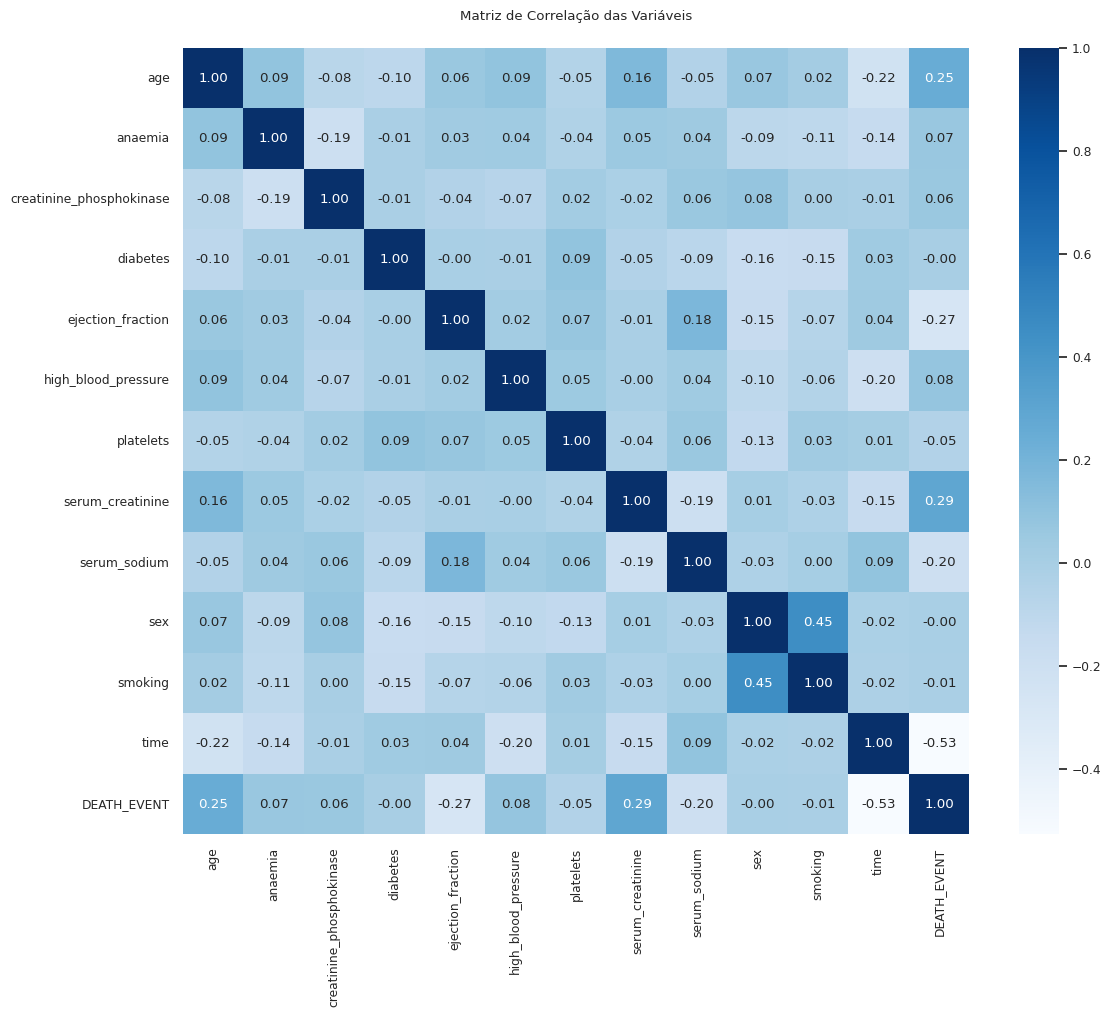

In [ ]:
correlacoes = dados.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(correlacoes, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Matriz de Correlação das Variáveis', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()

Text(0, 0.5, 'Contagem de Plaquetas')

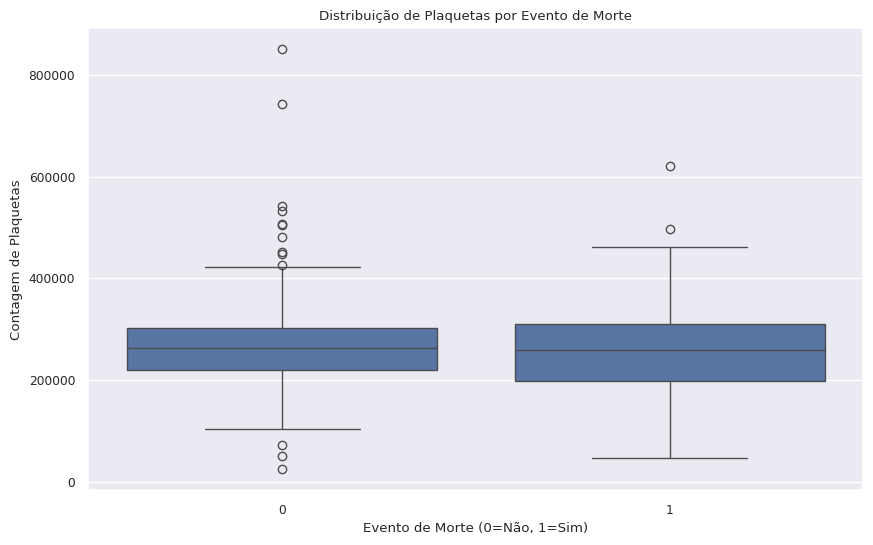

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="DEATH_EVENT", y="platelets", data=dados)
plt.title('Distribuição de Plaquetas por Evento de Morte')
plt.xlabel('Evento de Morte (0=Não, 1=Sim)')
plt.ylabel('Contagem de Plaquetas')

<Figure size 1400x1500 with 0 Axes>

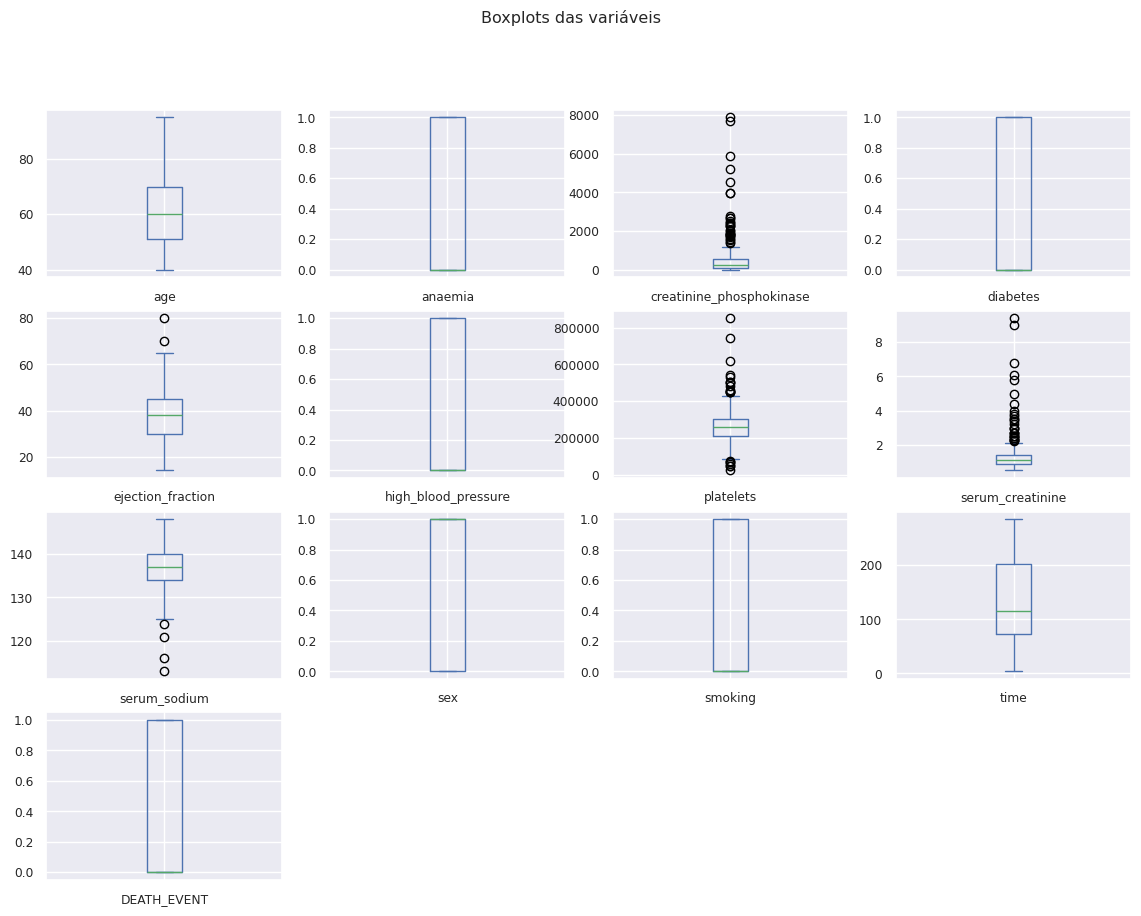

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,15))
dados.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14,10))
plt.suptitle("Boxplots das variáveis")
plt.show()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('boxplot_variaveis.png', bbox_inches='tight')
plt.show()

# Etapa de pré-processamento

# Visualização com o PCA

In [ ]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
x=dados.drop('DEATH_EVENT', axis=1)
y=dados['DEATH_EVENT']
print(x)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [ ]:
pca = decomposition.PCA(n_components=3)
pca.fit(x_scaler)
x_pca = pca.transform(x_scaler)
x_pca

array([[ 8.77054673e-01, -2.28710374e+00, -1.03322965e+00],
       [ 1.86375293e+00,  1.55289357e+00, -7.19820671e-01],
       [ 2.52642876e+00, -1.36982133e+00, -1.28559620e+00],
       [ 5.79565724e-01, -1.14323214e+00, -6.31174443e-01],
       [-9.60484516e-01, -2.63938442e+00, -4.43095848e+00],
       [ 1.20255582e+00, -3.62504778e+00,  9.12586404e-01],
       [ 9.35818232e-01, -2.00449667e+00, -3.72262836e-01],
       [ 5.10869248e-02, -6.27725297e-01,  3.45498229e-01],
       [-1.31971738e+00, -5.39899312e-01,  1.09748701e+00],
       [ 1.20566486e+00, -5.70227868e+00, -9.60706659e-01],
       [ 9.94287566e-01, -3.52498599e+00,  1.75815362e-01],
       [ 1.61223595e+00, -8.37442955e-01,  1.11067907e+00],
       [ 5.83570123e-01, -4.69636307e-01, -2.96245216e-01],
       [-3.52272879e-01, -1.16899066e+00,  8.11055931e-01],
       [-1.78586913e+00, -7.65886374e-01,  6.68576380e-01],
       [ 3.75759138e-01, -2.32659463e+00,  7.65086294e-01],
       [ 1.49524848e-01, -1.90815954e+00

In [ ]:
pca.explained_variance_ratio_

array([0.13858049, 0.13159129, 0.10567855])

In [ ]:
pca.components_.T

array([[ 0.04910096, -0.49093212,  0.18210792],
       [-0.22818273, -0.3204641 ,  0.15043645],
       [ 0.16276474,  0.23092179, -0.08398492],
       [-0.2846968 ,  0.1515776 , -0.38923962],
       [-0.26181158,  0.04666221,  0.44331474],
       [-0.19025566, -0.26518934,  0.22977573],
       [-0.17021348,  0.1570159 ,  0.12455731],
       [ 0.0371995 , -0.4036002 , -0.26900254],
       [-0.0935383 ,  0.24087094,  0.62552819],
       [ 0.62237639, -0.03396914,  0.092957  ],
       [ 0.55387042,  0.00854975,  0.21630183],
       [-0.00198151,  0.51058016, -0.04159205]])

In [ ]:
componentes_principais= pca.components_

In [ ]:
print("Variância explicada por cada componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"PC3: {pca.explained_variance_ratio_[2]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Variância explicada por cada componente:
PC1: 13.86%
PC2: 13.16%
PC3: 10.57%
Total: 37.59%


Text(0.5, 0.92, 'PCA da base de dados de infarto')

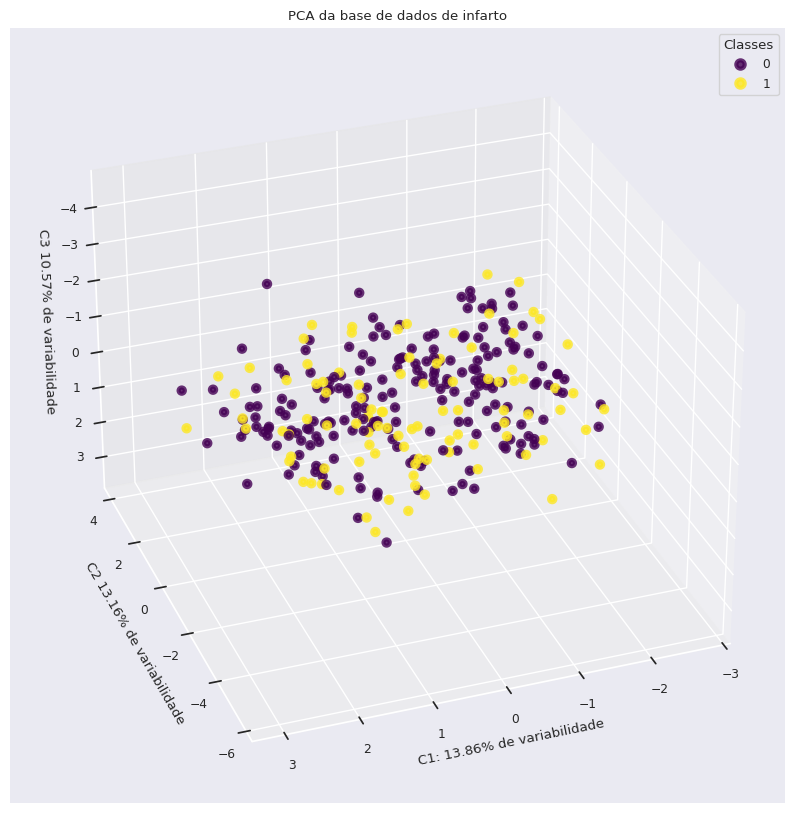

In [ ]:
fig = plt.figure(4,figsize=(10, 12))
ax = fig.add_subplot(projection='3d',elev=-150, azim=110)

scatter=ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=y, alpha=.8, lw=3, cmap='viridis')

ax.set_xlabel('C1: '+ str("{:.2f}".format(100*pca.explained_variance_ratio_[0])) + '% de variabilidade')
ax.set_ylabel('C2 ' + str("{:.2f}".format(100*pca.explained_variance_ratio_[1])) + '% de variabilidade')
ax.set_zlabel('C3 ' + str("{:.2f}".format(100*pca.explained_variance_ratio_[2])) + '% de variabilidade')
ax.legend(*scatter.legend_elements(), title="Classes")
plt.title('PCA da base de dados de infarto')

In [ ]:
print("Variância explicada por cada componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"PC3: {pca.explained_variance_ratio_[2]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Variância explicada por cada componente:
PC1: 13.86%
PC2: 13.16%
PC3: 10.57%
Total: 37.59%


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets

import time

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,make_scorer

# Grid Search para a base original sem balanceamento

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y=le.fit_transform(y)
dataset_name='heart_failure_clinical_records_dataset'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.20)

In [ ]:
dftrain=pd.DataFrame(x_train, columns=x.columns)
dftrain['Class'] = y_train
dftrain.to_csv('dftrain.csv', index=False)
dftrain


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,-0.491279,-0.871105,-0.010158,1.179830,-0.260991,-0.735688,-0.331400,-0.575031,1.447094,-1.359272,-0.687682,1.093630,0
1,0.771889,-0.871105,0.640223,-0.847579,1.008578,1.359272,0.969290,-0.478205,0.993074,-1.359272,-0.687682,0.848419,0
2,-0.238646,-0.871105,0.000166,1.179830,-0.260991,-0.735688,-1.447739,-0.478205,0.539054,0.735688,1.454161,-0.764811,0
3,-1.501814,1.147968,-0.231081,-0.847579,1.008578,-0.735688,-0.269950,-0.090900,-0.368986,-1.359272,-0.687682,-0.429259,0
4,-0.070223,-0.871105,-0.539753,-0.847579,-1.107370,1.359272,-0.525991,2.039276,-0.141976,0.735688,1.454161,0.732266,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,-0.238646,-0.871105,-0.464392,1.179830,-0.007077,1.359272,-0.106083,-0.381379,0.539054,0.735688,-0.687682,1.287217,0
235,-0.996547,1.147968,-0.529430,-0.847579,1.008578,-0.735688,-1.345323,-0.381379,0.766064,-1.359272,-0.687682,0.216033,0
236,-0.322857,1.147968,-0.467489,-0.847579,-0.684180,-0.735688,1.348231,-0.381379,0.766064,-1.359272,-0.687682,-1.139081,1
237,0.603467,1.147968,0.066236,-0.847579,-1.107370,-0.735688,0.426482,0.683709,-1.504036,0.735688,-0.687682,-0.287295,0


In [ ]:
dftest=pd.DataFrame(x_test, columns=x.columns)
dftest['Class'] = y_test
dftest.to_csv('dftest.csv', index=False)
dftest

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,-0.912335,-0.871105,0.000166,1.179830,-0.007077,-0.735688,4.776906e-01,0.490057,-0.368986,0.735688,1.454161,-1.229421,1
1,-1.333392,-0.871105,-0.299216,1.179830,-0.260991,-0.735688,6.008180e+00,-0.090900,1.220084,0.735688,1.454161,-0.545412,0
2,0.771889,-0.871105,2.181521,1.179830,0.162199,-0.735688,-2.289830e-01,-0.381379,0.085034,0.735688,-0.687682,1.506616,0
3,-0.491279,-0.871105,-0.253792,-0.847579,0.585389,1.359272,6.210736e-01,-0.478205,0.766064,-1.359272,-0.687682,-0.726094,0
4,1.192945,-0.871105,-0.498459,-0.847579,-0.007077,1.359272,-4.030910e-01,1.071014,-0.595996,0.735688,-0.687682,0.409620,1
5,1.192945,1.147968,-0.391095,1.179830,-0.007077,1.359272,2.011661e-01,-0.768683,-1.277026,0.735688,1.454161,-0.726094,0
6,-1.754448,1.147968,-0.467489,-0.847579,-0.260991,-0.735688,-8.559998e-02,-0.478205,0.085034,0.735688,-0.687682,1.016195,0
7,0.350833,-0.871105,-0.484006,1.179830,-1.107370,-0.735688,2.392879e+00,0.422279,-0.368986,0.735688,-0.687682,-0.816435,1
8,1.782424,1.147968,0.281997,1.179830,1.008578,1.359272,5.903487e-01,-0.381379,1.901114,-1.359272,-0.687682,-1.293951,1
9,-0.238646,-0.871105,0.000166,1.179830,-1.107370,-0.735688,2.464570e+00,-0.381379,0.312044,0.735688,-0.687682,0.964571,0


In [ ]:
Xtest = dftest.drop(columns=['Class'])
ytest = dftest['Class']

In [ ]:
classifiers=[


  ('MultiLayerPerceptron','MLP',    MLPClassifier(),
	{'hidden_layer_sizes':[[5],[5,5],[5,5,5],[5,5,5,5],[10],[10,10],[10,10,10],[50]],
	'activation':['identity', 'logistic', 'tanh', 'relu'],
	 'max_iter': [1000],
	})




]

In [ ]:
Xt=pd.read_csv('/content/dftrain.csv')
yt=pd.read_csv('/content/dftrain.csv')

In [ ]:
import pandas as pd
Xt = pd.read_csv('/content/dftrain.csv')
yt = pd.read_csv('/content/dftrain.csv', usecols=['Class'])


print("Total NaNs (X):", Xt.isnull().sum().sum())
Xt.isnull().sum()


Xt.info()
yt['Class'].value_counts()


Total NaNs (X): 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anaemia                   239 non-null    float64
 2   creatinine_phosphokinase  239 non-null    float64
 3   diabetes                  239 non-null    float64
 4   ejection_fraction         239 non-null    float64
 5   high_blood_pressure       239 non-null    float64
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    float64
 9   sex                       239 non-null    float64
 10  smoking                   239 non-null    float64
 11  time                      239 non-null    float64
 12  Class                     239 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 24.4 KB


,count
Class,
0,161
1,78


In [ ]:
Xt.dropna(inplace=True)
yt.dropna(inplace=True)

In [ ]:
Xt

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,-0.491279,-0.871105,-0.010158,1.179830,-0.260991,-0.735688,-0.331400,-0.575031,1.447094,-1.359272,-0.687682,1.093630,0
1,0.771889,-0.871105,0.640223,-0.847579,1.008578,1.359272,0.969290,-0.478205,0.993074,-1.359272,-0.687682,0.848419,0
2,-0.238646,-0.871105,0.000166,1.179830,-0.260991,-0.735688,-1.447739,-0.478205,0.539054,0.735688,1.454161,-0.764811,0
3,-1.501814,1.147968,-0.231081,-0.847579,1.008578,-0.735688,-0.269950,-0.090900,-0.368986,-1.359272,-0.687682,-0.429259,0
4,-0.070223,-0.871105,-0.539753,-0.847579,-1.107370,1.359272,-0.525991,2.039276,-0.141976,0.735688,1.454161,0.732266,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,-0.238646,-0.871105,-0.464392,1.179830,-0.007077,1.359272,-0.106083,-0.381379,0.539054,0.735688,-0.687682,1.287217,0
235,-0.996547,1.147968,-0.529430,-0.847579,1.008578,-0.735688,-1.345323,-0.381379,0.766064,-1.359272,-0.687682,0.216033,0
236,-0.322857,1.147968,-0.467489,-0.847579,-0.684180,-0.735688,1.348231,-0.381379,0.766064,-1.359272,-0.687682,-1.139081,1
237,0.603467,1.147968,0.066236,-0.847579,-1.107370,-0.735688,0.426482,0.683709,-1.504036,0.735688,-0.687682,-0.287295,0


In [ ]:
xt_drop=Xt.drop(columns=['Class'])
xt_drop

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.491279,-0.871105,-0.010158,1.179830,-0.260991,-0.735688,-0.331400,-0.575031,1.447094,-1.359272,-0.687682,1.093630
1,0.771889,-0.871105,0.640223,-0.847579,1.008578,1.359272,0.969290,-0.478205,0.993074,-1.359272,-0.687682,0.848419
2,-0.238646,-0.871105,0.000166,1.179830,-0.260991,-0.735688,-1.447739,-0.478205,0.539054,0.735688,1.454161,-0.764811
3,-1.501814,1.147968,-0.231081,-0.847579,1.008578,-0.735688,-0.269950,-0.090900,-0.368986,-1.359272,-0.687682,-0.429259
4,-0.070223,-0.871105,-0.539753,-0.847579,-1.107370,1.359272,-0.525991,2.039276,-0.141976,0.735688,1.454161,0.732266
...,...,...,...,...,...,...,...,...,...,...,...,...
234,-0.238646,-0.871105,-0.464392,1.179830,-0.007077,1.359272,-0.106083,-0.381379,0.539054,0.735688,-0.687682,1.287217
235,-0.996547,1.147968,-0.529430,-0.847579,1.008578,-0.735688,-1.345323,-0.381379,0.766064,-1.359272,-0.687682,0.216033
236,-0.322857,1.147968,-0.467489,-0.847579,-0.684180,-0.735688,1.348231,-0.381379,0.766064,-1.359272,-0.687682,-1.139081
237,0.603467,1.147968,0.066236,-0.847579,-1.107370,-0.735688,0.426482,0.683709,-1.504036,0.735688,-0.687682,-0.287295


In [ ]:
yt

,Class
0,0
1,0
2,0
3,0
4,0
...,...
234,0
235,0
236,1
237,0


In [ ]:
import time

list_models=[]


#mínimo 30 iterações
for run in range(30):
    for name, clf_name, clf, clf_param_grid in classifiers:

      n_folds=5

      #instancia método de validação cruzada
      cv = model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=run)


      #instancia o Grid Search: classificador, grade de parâmetros, validacao cruzada, score
      clf_gcv=model_selection.GridSearchCV(estimator=clf, param_grid=clf_param_grid, cv=cv, scoring=make_scorer(accuracy_score), n_jobs=-1, verbose=0)

      #atribui o tempo quando inicia o processo de divisão em treinamento e teste
      st = time.time()


      #divide treinameto e teste
      for train, test in cv.split(xt_drop):
          X_train, X_test = xt_drop.values[train], xt_drop.values[test]
          y_train, y_test = yt['Class'].values[train], yt['Class'].values[test]

      #treina
      clf_gcv.fit(X_train, y_train)

      #imprime melhores parâmetros
      print(clf_gcv.best_params_)

      #realiza a predição
      y_pred = clf_gcv.predict(X_test)

      #calcula o tempo final
      st = time.time()-st

      #imprime metricas
      print(run, clf_name, f1_score(y_test, y_pred, average='weighted'), \
			    accuracy_score(y_test, y_pred), \
			    recall_score(y_test, y_pred, average='weighted'), \
			    clf_gcv.best_params_)

      #armazena infromações em um dicionário
      l = {
		'DATASET'	: dataset_name						,
		'MODEL'		: clf_name						,
		'RUN'		: run							,
		'BEST_PARAMS'	: clf_gcv.best_params_			 		,
		'TIME'		: st							,
		'Y_TRUE'	     	: y_test						,
		'Y_PRED'	     	: y_pred						,
		'F1'	     	: f1_score(y_test, y_pred, average='weighted')		,
		'ACCURACY'	     	: accuracy_score(y_test, y_pred)			,
		'RECALL'	     	: recall_score(y_test, y_pred, average='weighted')	,
		}
    #adiciona a cada rodada em uma lista
      list_models.append(l)

{'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}
0 MLP 0.7537169646076968 0.7659574468085106 0.7659574468085106 {'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'logistic', 'hidden_layer_sizes': [10], 'max_iter': 1000}
1 MLP 0.8882041886996709 0.8936170212765957 0.8936170212765957 {'activation': 'logistic', 'hidden_layer_sizes': [10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [5], 'max_iter': 1000}
2 MLP 0.6989891579033178 0.7021276595744681 0.7021276595744681 {'activation': 'tanh', 'hidden_layer_sizes': [5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
3 MLP 0.7605935991417844 0.7659574468085106 0.7659574468085106 {'activation': 'identity', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
4 MLP 0.6895736528898673 0.7021276595744681 0.7021276595744681 {'activation': 'identity', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
5 MLP 0.8257437181091749 0.8297872340425532 0.8297872340425532 {'activation': 'identity', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [5], 'max_iter': 1000}
6 MLP 0.8246396705559369 0.8297872340425532 0.8297872340425532 {'activation': 'relu', 'hidden_layer_sizes': [5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'logistic', 'hidden_layer_sizes': [10], 'max_iter': 1000}
7 MLP 0.8922602528522974 0.8936170212765957 0.8936170212765957 {'activation': 'logistic', 'hidden_layer_sizes': [10], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}
8 MLP 0.7274693489335643 0.723404255319149 0.723404255319149 {'activation': 'identity', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [10], 'max_iter': 1000}
9 MLP 0.8297872340425532 0.8297872340425532 0.8297872340425532 {'activation': 'identity', 'hidden_layer_sizes': [10], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
10 MLP 0.8461239899791821 0.851063829787234 0.851063829787234 {'activation': 'identity', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}
11 MLP 0.8428307634404808 0.851063829787234 0.851063829787234 {'activation': 'ident

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}
13 MLP 0.8501983411467724 0.851063829787234 0.851063829787234 {'activation': 'tanh', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
14 MLP 0.8158371877890842 0.8085106382978723 0.8085106382978723 {'activation': 'identity', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}
15 MLP 0.7944391604018188 0.8085106382978723 0.8085106382978723 {'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}
{'activation': 'logistic', 'hidden_layer_sizes': [5], 'max_iter': 1000}
16 MLP 0.8262871879893156 0.8297872340425532 0.8297872340425532 {'activation': 'logistic', 'hidden_layer_sizes': [5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}
17 MLP 0.804515331198275 0.8085106382978723 0.8085106382978723 {'activation': 'ide

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [5], 'max_iter': 1000}
18 MLP 0.8461239899791821 0.851063829787234 0.851063829787234 {'activation': 'tanh', 'hidden_layer_sizes': [5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}
19 MLP 0.7285622179239201 0.7446808510638298 0.7446808510638298 {'activation': 'identity', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}
20 MLP 0.9148936170212766 0.9148936170212766 0.9148936170212766 {'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [10, 10, 10], 'max_iter': 1000}
21 MLP 0.8066820926688866 0.8085106382978723 0.8085106382978723 {'activation': 'identity', 'hidden_layer_sizes': [10, 10, 10], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}
22 MLP 0.8496416276313562 0.851063829787234 0.851063829787234 {'activa

In [ ]:
#salva os resultados em um dataframe
aux = pd.DataFrame(list_models)
aux

,DATASET,MODEL,RUN,BEST_PARAMS,TIME,Y_TRUE,Y_PRED,F1,ACCURACY,RECALL
0,heart_failure_clinical_records_dataset,MLP,0,"{'activation': 'identity', 'hidden_layer_sizes...",70.687723,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...",0.753717,0.765957,0.765957
1,heart_failure_clinical_records_dataset,MLP,1,"{'activation': 'logistic', 'hidden_layer_sizes...",73.758074,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.888204,0.893617,0.893617
2,heart_failure_clinical_records_dataset,MLP,2,"{'activation': 'tanh', 'hidden_layer_sizes': [...",66.297232,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, ...",0.698989,0.702128,0.702128
3,heart_failure_clinical_records_dataset,MLP,3,"{'activation': 'identity', 'hidden_layer_sizes...",63.294789,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.760594,0.765957,0.765957
4,heart_failure_clinical_records_dataset,MLP,4,"{'activation': 'identity', 'hidden_layer_sizes...",65.666702,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ...",0.689574,0.702128,0.702128
5,heart_failure_clinical_records_dataset,MLP,5,"{'activation': 'identity', 'hidden_layer_sizes...",63.986339,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...",0.825744,0.829787,0.829787
6,heart_failure_clinical_records_dataset,MLP,6,"{'activation': 'relu', 'hidden_layer_sizes': [...",68.334073,"[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.824640,0.829787,0.829787
7,heart_failure_clinical_records_dataset,MLP,7,"{'activation': 'logistic', 'hidden_layer_sizes...",65.546954,"[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.892260,0.893617,0.893617
8,heart_failure_clinical_records_dataset,MLP,8,"{'activation': 'identity', 'hidden_layer_sizes...",66.530409,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",0.727469,0.723404,0.723404
9,heart_failure_clinical_records_dataset,MLP,9,"{'activation': 'identity', 'hidden_layer_sizes...",65.288732,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...",0.829787,0.829787,0.829787


In [ ]:
#selecionando modelos
aux_mlp = aux[aux['MODEL']=='MLP']
aux_mlp

,DATASET,MODEL,RUN,BEST_PARAMS,TIME,Y_TRUE,Y_PRED,F1,ACCURACY,RECALL
0,heart_failure_clinical_records_dataset,MLP,0,"{'activation': 'identity', 'hidden_layer_sizes...",70.687723,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...",0.753717,0.765957,0.765957
1,heart_failure_clinical_records_dataset,MLP,1,"{'activation': 'logistic', 'hidden_layer_sizes...",73.758074,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.888204,0.893617,0.893617
2,heart_failure_clinical_records_dataset,MLP,2,"{'activation': 'tanh', 'hidden_layer_sizes': [...",66.297232,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, ...",0.698989,0.702128,0.702128
3,heart_failure_clinical_records_dataset,MLP,3,"{'activation': 'identity', 'hidden_layer_sizes...",63.294789,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.760594,0.765957,0.765957
4,heart_failure_clinical_records_dataset,MLP,4,"{'activation': 'identity', 'hidden_layer_sizes...",65.666702,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ...",0.689574,0.702128,0.702128
5,heart_failure_clinical_records_dataset,MLP,5,"{'activation': 'identity', 'hidden_layer_sizes...",63.986339,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...",0.825744,0.829787,0.829787
6,heart_failure_clinical_records_dataset,MLP,6,"{'activation': 'relu', 'hidden_layer_sizes': [...",68.334073,"[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.824640,0.829787,0.829787
7,heart_failure_clinical_records_dataset,MLP,7,"{'activation': 'logistic', 'hidden_layer_sizes...",65.546954,"[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.892260,0.893617,0.893617
8,heart_failure_clinical_records_dataset,MLP,8,"{'activation': 'identity', 'hidden_layer_sizes...",66.530409,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",0.727469,0.723404,0.723404
9,heart_failure_clinical_records_dataset,MLP,9,"{'activation': 'identity', 'hidden_layer_sizes...",65.288732,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...",0.829787,0.829787,0.829787


In [ ]:
#media acuracia
acc_mean = aux_mlp['ACCURACY'].mean()
acc_mean

np.float64(0.8085106382978723)

In [ ]:
#ordenando
aux_mlp.sort_values(['ACCURACY'])

,DATASET,MODEL,RUN,BEST_PARAMS,TIME,Y_TRUE,Y_PRED,F1,ACCURACY,RECALL
23,heart_failure_clinical_records_dataset,MLP,23,"{'activation': 'identity', 'hidden_layer_sizes...",64.936878,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.641233,0.680851,0.680851
2,heart_failure_clinical_records_dataset,MLP,2,"{'activation': 'tanh', 'hidden_layer_sizes': [...",66.297232,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, ...",0.698989,0.702128,0.702128
4,heart_failure_clinical_records_dataset,MLP,4,"{'activation': 'identity', 'hidden_layer_sizes...",65.666702,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ...",0.689574,0.702128,0.702128
8,heart_failure_clinical_records_dataset,MLP,8,"{'activation': 'identity', 'hidden_layer_sizes...",66.530409,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",0.727469,0.723404,0.723404
19,heart_failure_clinical_records_dataset,MLP,19,"{'activation': 'identity', 'hidden_layer_sizes...",66.551523,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.728562,0.744681,0.744681
24,heart_failure_clinical_records_dataset,MLP,24,"{'activation': 'identity', 'hidden_layer_sizes...",65.501029,"[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.734919,0.744681,0.744681
0,heart_failure_clinical_records_dataset,MLP,0,"{'activation': 'identity', 'hidden_layer_sizes...",70.687723,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...",0.753717,0.765957,0.765957
3,heart_failure_clinical_records_dataset,MLP,3,"{'activation': 'identity', 'hidden_layer_sizes...",63.294789,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.760594,0.765957,0.765957
29,heart_failure_clinical_records_dataset,MLP,29,"{'activation': 'identity', 'hidden_layer_sizes...",70.007035,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, ...",0.757003,0.765957,0.765957
17,heart_failure_clinical_records_dataset,MLP,17,"{'activation': 'identity', 'hidden_layer_sizes...",68.304195,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, ...",0.804515,0.808511,0.808511


In [ ]:
#melhores parametros
aux_mlp[aux_mlp.index == 17]['BEST_PARAMS'].values

array([{'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}],
      dtype=object)

In [ ]:
Xtrain = pd.read_csv('dftrain.csv')
ytrain = pd.read_csv('dftrain.csv', usecols=['Class'])
Xtest = pd.read_csv('dftest.csv')
ytest = pd.read_csv('dftest.csv', usecols=['Class'])

In [ ]:
X_test=Xtest.drop(columns=['Class'])
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.912335,-0.871105,0.000166,1.179830,-0.007077,-0.735688,4.776906e-01,0.490057,-0.368986,0.735688,1.454161,-1.229421
1,-1.333392,-0.871105,-0.299216,1.179830,-0.260991,-0.735688,6.008180e+00,-0.090900,1.220084,0.735688,1.454161,-0.545412
2,0.771889,-0.871105,2.181521,1.179830,0.162199,-0.735688,-2.289830e-01,-0.381379,0.085034,0.735688,-0.687682,1.506616
3,-0.491279,-0.871105,-0.253792,-0.847579,0.585389,1.359272,6.210736e-01,-0.478205,0.766064,-1.359272,-0.687682,-0.726094
4,1.192945,-0.871105,-0.498459,-0.847579,-0.007077,1.359272,-4.030910e-01,1.071014,-0.595996,0.735688,-0.687682,0.409620
5,1.192945,1.147968,-0.391095,1.179830,-0.007077,1.359272,2.011661e-01,-0.768683,-1.277026,0.735688,1.454161,-0.726094
6,-1.754448,1.147968,-0.467489,-0.847579,-0.260991,-0.735688,-8.559998e-02,-0.478205,0.085034,0.735688,-0.687682,1.016195
7,0.350833,-0.871105,-0.484006,1.179830,-1.107370,-0.735688,2.392879e+00,0.422279,-0.368986,0.735688,-0.687682,-0.816435
8,1.782424,1.147968,0.281997,1.179830,1.008578,1.359272,5.903487e-01,-0.381379,1.901114,-1.359272,-0.687682,-1.293951
9,-0.238646,-0.871105,0.000166,1.179830,-1.107370,-0.735688,2.464570e+00,-0.381379,0.312044,0.735688,-0.687682,0.964571


In [ ]:
X_train=Xtrain.drop(columns=['Class'])
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.491279,-0.871105,-0.010158,1.179830,-0.260991,-0.735688,-0.331400,-0.575031,1.447094,-1.359272,-0.687682,1.093630
1,0.771889,-0.871105,0.640223,-0.847579,1.008578,1.359272,0.969290,-0.478205,0.993074,-1.359272,-0.687682,0.848419
2,-0.238646,-0.871105,0.000166,1.179830,-0.260991,-0.735688,-1.447739,-0.478205,0.539054,0.735688,1.454161,-0.764811
3,-1.501814,1.147968,-0.231081,-0.847579,1.008578,-0.735688,-0.269950,-0.090900,-0.368986,-1.359272,-0.687682,-0.429259
4,-0.070223,-0.871105,-0.539753,-0.847579,-1.107370,1.359272,-0.525991,2.039276,-0.141976,0.735688,1.454161,0.732266
...,...,...,...,...,...,...,...,...,...,...,...,...
234,-0.238646,-0.871105,-0.464392,1.179830,-0.007077,1.359272,-0.106083,-0.381379,0.539054,0.735688,-0.687682,1.287217
235,-0.996547,1.147968,-0.529430,-0.847579,1.008578,-0.735688,-1.345323,-0.381379,0.766064,-1.359272,-0.687682,0.216033
236,-0.322857,1.147968,-0.467489,-0.847579,-0.684180,-0.735688,1.348231,-0.381379,0.766064,-1.359272,-0.687682,-1.139081
237,0.603467,1.147968,0.066236,-0.847579,-1.107370,-0.735688,0.426482,0.683709,-1.504036,0.735688,-0.687682,-0.287295


### Desvio das métricas

In [ ]:
acc_std=aux_mlp['ACCURACY'].std()
acc_std

0.05913262415145968

In [ ]:
f1_std=aux_mlp['F1'].std()
f1_std

0.06371485359833237

In [ ]:
recall_std=aux_mlp['RECALL'].std()
recall_std

0.05913262415145968

### Média das métricas

In [ ]:
media_acuracia=aux_mlp['ACCURACY'].mean()
media_acuracia

np.float64(0.8085106382978723)

In [ ]:
media_f1=aux_mlp['F1'].mean()
media_f1

np.float64(0.8019516674214194)

In [ ]:
media_recall=aux_mlp['RECALL'].mean()
media_recall

np.float64(0.8085106382978723)

## Usando os melhores parametros

In [ ]:

BEST_PARAMS = aux_mlp[aux_mlp.index == 17]['BEST_PARAMS'].values[0]

clf=MLPClassifier(**BEST_PARAMS)

In [ ]:
clf.fit(X_train, ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=[5, 5, 5], max_iter=1000)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
acc=metrics.accuracy_score(ytest, y_pred)
acc

0.7333333333333333

<Axes: >

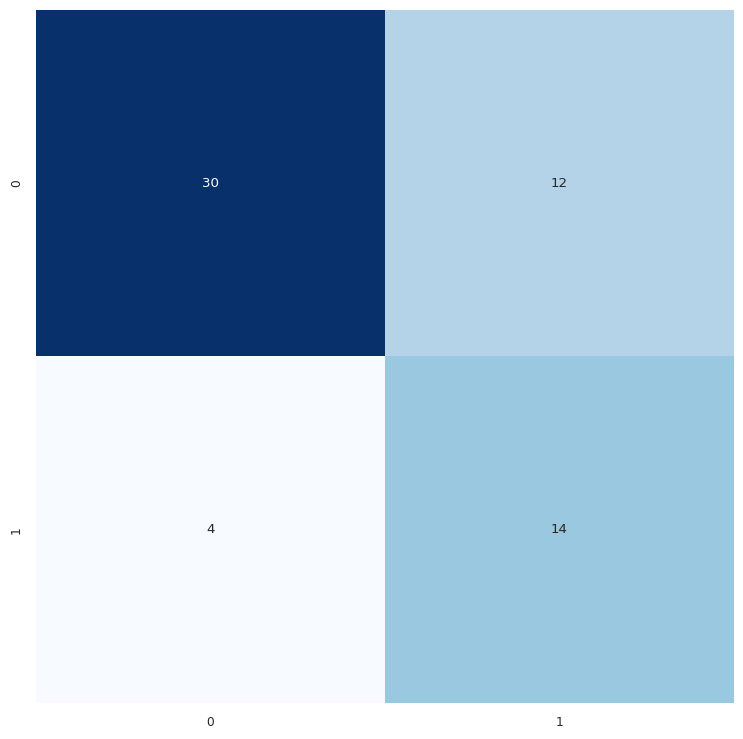

In [ ]:
MATRIS_CONFU=metrics.confusion_matrix(ytest, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(MATRIS_CONFU, annot=True, fmt='d', cmap='Blues', cbar=False)

# Balanceamento de **dados**(ADASYN)

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
asn = ADASYN(n_neighbors=5)

In [ ]:
X_asn,y_asn=asn.fit_resample(x_scaler,y)
print(y_asn)
print(X_asn)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 1.19294523e+00 -8.71104775e-01  1.65728387e-04 ...  7.35688190e-01
  -6.87681906e-01 -1.62950241e+00]
 [-4.91279276e-01 -8.71104775e-01  7.51463953e+00 ...  7.35688190e-01
  -6.87681906e-01 -

In [ ]:
import numpy as np
np.bincount(y_asn)

array([203, 194])

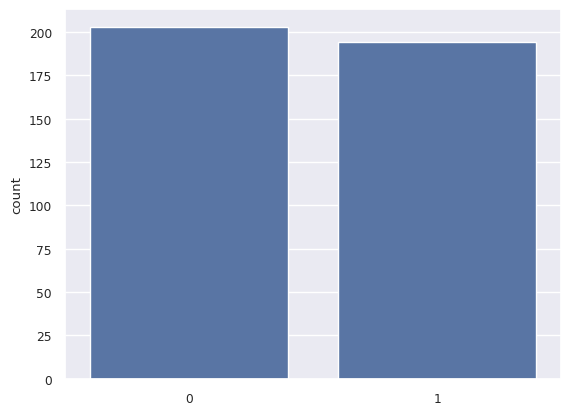

In [ ]:
ax=sns.countplot(x=y_asn)

## Grid search para os dados balanceados

In [ ]:
le.processingle = preprocessing.LabelEncoder()
y2=le.fit_transform(y_asn)
y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
np.bincount(y2)

array([203, 194])

In [ ]:
dataset_name='infarto'

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_asn, y2, test_size=0.20)

In [ ]:
x.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

## Salvar os conjuntos de test e treinamento em um arquivo

In [ ]:
df_train2=pd.DataFrame(x_train2,columns=x.columns)
df_train2['Class'] = y_train2
df_train2.to_csv('infarto_train.csv',index=False)

In [ ]:
df_train2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,-0.743913,-0.871105,-0.404515,1.179830,-0.007077,-0.735688,1.215089,-0.381379,0.766064,0.735688,1.454161,1.648581,0
1,-1.333392,1.147968,0.412073,-0.847579,-0.684180,-0.735688,-1.304356,-0.284552,0.085034,0.735688,-0.687682,-1.539162,1
2,0.266622,-0.871105,1.061421,-0.847579,1.854958,-0.735688,-0.218741,-0.381379,0.085034,0.735688,-0.687682,-0.222766,0
3,-0.659702,1.147968,0.000166,-0.847579,0.585389,-0.735688,0.426482,-0.284552,0.085034,0.735688,1.454161,1.016195,0
4,-0.429338,1.147968,-0.317551,1.179830,-1.269897,0.956983,0.220724,-0.325599,0.775114,-1.359272,-0.687682,-0.706688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,-0.325749,1.147968,0.553295,1.179830,1.212907,-0.735688,-1.080153,-0.343313,1.220084,-1.359272,-0.687682,-0.891038,1
313,-0.070223,1.147968,-0.439615,1.179830,-1.107370,1.359272,0.559624,-0.187726,0.085034,-1.359272,-0.687682,-0.584129,0
314,0.350833,-0.871105,-0.264116,-0.847579,-0.007077,-0.735688,0.313824,0.296405,0.539054,-1.359272,-0.687682,1.158159,0
315,-0.912335,-0.871105,0.000166,-0.847579,2.024234,1.359272,-1.191698,-0.575031,0.766064,0.735688,1.454161,0.796795,0


In [ ]:
df_test2=pd.DataFrame(x_test2,columns=x.columns)
df_test2['Class'] = y_test2
df_test2.to_csv('infarto_test.csv',index=False)

In [ ]:
df_test2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,-0.912335,-0.871105,-0.398321,-0.847579,0.585389,-0.735688,1.348231e+00,0.199578,-0.141976,0.735688,1.454161,1.997038,0
1,-1.333392,-0.871105,0.034233,1.179830,1.431768,-0.735688,-4.235743e-01,-0.575031,0.993074,-1.359272,-0.687682,1.635675,0
2,-1.080758,1.147968,0.000166,1.179830,1.431768,-0.735688,-1.806197e+00,0.490057,-3.547126,-1.359272,-0.687682,-1.487538,1
3,1.614001,-0.871105,0.230380,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.595996,0.735688,-0.687682,-0.274389,1
4,-0.912335,-0.871105,-0.409677,-0.847579,-0.684180,-0.735688,2.705813e-02,-0.671857,0.993074,0.735688,1.454161,-0.235672,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.491279,-0.871105,0.637126,-0.847579,-1.530560,-0.735688,7.535660e-09,0.422279,-0.595996,0.735688,1.454161,1.429181,1
76,-0.070223,-0.871105,-0.429292,-0.847579,-0.684180,-0.735688,-2.062238e+00,0.296405,-2.185066,-1.359272,-0.687682,0.990383,1
77,-0.701722,-0.871105,-0.107242,-0.847579,0.585216,-0.735688,-1.363340e+00,-0.502303,-0.993425,-1.359272,-0.687682,0.651651,1
78,0.771889,-0.871105,-0.500524,-0.847579,1.854958,1.359272,-4.440576e-01,-0.478205,0.312044,0.735688,-0.687682,0.719360,0


In [ ]:
classifiers=[


  ('MultiLayerPerceptron','MLP',    MLPClassifier(),
	{'hidden_layer_sizes':[[5],[5,5],[5,5,5],[5,5,5,5],[10],[10,10],[10,10,10],[50]],
	'activation':['identity', 'logistic', 'tanh', 'relu'],
	 'max_iter': [1000],
	})





]

In [ ]:
Xt2=pd.read_csv('/content/infarto_train.csv')
yt2=pd.read_csv('/content/infarto_train.csv', usecols=['Class'])

In [ ]:
yt2

,Class
0,0
1,1
2,0
3,0
4,1
...,...
312,1
313,0
314,0
315,0


In [ ]:
Xt2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,-0.743913,-0.871105,-0.404515,1.179830,-0.007077,-0.735688,1.215089,-0.381379,0.766064,0.735688,1.454161,1.648581,0
1,-1.333392,1.147968,0.412073,-0.847579,-0.684180,-0.735688,-1.304356,-0.284552,0.085034,0.735688,-0.687682,-1.539162,1
2,0.266622,-0.871105,1.061421,-0.847579,1.854958,-0.735688,-0.218741,-0.381379,0.085034,0.735688,-0.687682,-0.222766,0
3,-0.659702,1.147968,0.000166,-0.847579,0.585389,-0.735688,0.426482,-0.284552,0.085034,0.735688,1.454161,1.016195,0
4,-0.429338,1.147968,-0.317551,1.179830,-1.269897,0.956983,0.220724,-0.325599,0.775114,-1.359272,-0.687682,-0.706688,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,-0.325749,1.147968,0.553295,1.179830,1.212907,-0.735688,-1.080153,-0.343313,1.220084,-1.359272,-0.687682,-0.891038,1
313,-0.070223,1.147968,-0.439615,1.179830,-1.107370,1.359272,0.559624,-0.187726,0.085034,-1.359272,-0.687682,-0.584129,0
314,0.350833,-0.871105,-0.264116,-0.847579,-0.007077,-0.735688,0.313824,0.296405,0.539054,-1.359272,-0.687682,1.158159,0
315,-0.912335,-0.871105,0.000166,-0.847579,2.024234,1.359272,-1.191698,-0.575031,0.766064,0.735688,1.454161,0.796795,0


In [ ]:
import pandas as pd
Xt2=pd.read_csv('/content/infarto_train.csv')

yt2=pd.read_csv('/content/infarto_train.csv', usecols=['Class'])
print("Total NaNs (X):", Xt2.isnull().sum().sum())
Xt2.isnull().sum()


Xt2.info()
yt2['Class'].value_counts()


Total NaNs (X): 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       317 non-null    float64
 1   anaemia                   317 non-null    float64
 2   creatinine_phosphokinase  317 non-null    float64
 3   diabetes                  317 non-null    float64
 4   ejection_fraction         317 non-null    float64
 5   high_blood_pressure       317 non-null    float64
 6   platelets                 317 non-null    float64
 7   serum_creatinine          317 non-null    float64
 8   serum_sodium              317 non-null    float64
 9   sex                       317 non-null    float64
 10  smoking                   317 non-null    float64
 11  time                      317 non-null    float64
 12  Class                     317 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 32.3 KB


,count
Class,
0,166
1,151


In [ ]:
xt2=Xt2.drop(columns=['Class'])

In [ ]:
xt2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.743913,-0.871105,-0.404515,1.179830,-0.007077,-0.735688,1.215089,-0.381379,0.766064,0.735688,1.454161,1.648581
1,-1.333392,1.147968,0.412073,-0.847579,-0.684180,-0.735688,-1.304356,-0.284552,0.085034,0.735688,-0.687682,-1.539162
2,0.266622,-0.871105,1.061421,-0.847579,1.854958,-0.735688,-0.218741,-0.381379,0.085034,0.735688,-0.687682,-0.222766
3,-0.659702,1.147968,0.000166,-0.847579,0.585389,-0.735688,0.426482,-0.284552,0.085034,0.735688,1.454161,1.016195
4,-0.429338,1.147968,-0.317551,1.179830,-1.269897,0.956983,0.220724,-0.325599,0.775114,-1.359272,-0.687682,-0.706688
...,...,...,...,...,...,...,...,...,...,...,...,...
312,-0.325749,1.147968,0.553295,1.179830,1.212907,-0.735688,-1.080153,-0.343313,1.220084,-1.359272,-0.687682,-0.891038
313,-0.070223,1.147968,-0.439615,1.179830,-1.107370,1.359272,0.559624,-0.187726,0.085034,-1.359272,-0.687682,-0.584129
314,0.350833,-0.871105,-0.264116,-0.847579,-0.007077,-0.735688,0.313824,0.296405,0.539054,-1.359272,-0.687682,1.158159
315,-0.912335,-0.871105,0.000166,-0.847579,2.024234,1.359272,-1.191698,-0.575031,0.766064,0.735688,1.454161,0.796795


In [ ]:
import time

list_models=[]


#mínimo 30 iterações
for run in range(30):
    for name, clf_name, clf, clf_param_grid in classifiers:

      n_folds=5

      #instancia método de validação cruzada
      cv = model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=run)


      #instancia o Grid Search: classificador, grade de parâmetros, validacao cruzada, score
      clf_gcv=model_selection.GridSearchCV(estimator=MLPClassifier(max_iter=500, random_state=run), param_grid=clf_param_grid, cv=cv, scoring=make_scorer(accuracy_score), n_jobs=-1, verbose=0)

      #atribui o tempo quando inicia o processo de divisão em treinamento e teste
      st = time.time()


      #divide treinameto e teste
      for train, test in cv.split(xt2):
          x_train, x_test = xt2.values[train], xt2.values[test]
          y_train, y_test = yt2['Class'].values[train], yt2['Class'].values[test]

      #treina
      clf_gcv.fit(x_train, y_train)

      #imprime melhores parâmetros
      print(clf_gcv.best_params_)

      #realiza a predição
      y_pred = clf_gcv.predict(x_test)

      #calcula o tempo final
      st = time.time()-st

      #imprime metricas
      print(run, clf_name, f1_score(y_test, y_pred, average='weighted'), \
			    accuracy_score(y_test, y_pred), \
			    recall_score(y_test, y_pred, average='weighted'), \
			    clf_gcv.best_params_)

      #armazena infromações em um dicionário
      l = {
		'DATASET'	: dataset_name						,
		'MODEL'		: clf_name						,
		'RUN'		: run							,
		'BEST_PARAMS'	: clf_gcv.best_params_			 		,
		'TIME'		: st							,
		'Y_TRUE'	     	: y_test						,
		'Y_PRED'	     	: y_pred						,
		'F1'	     	: f1_score(y_test, y_pred, average='weighted')		,
		'ACCURACY'	     	: accuracy_score(y_test, y_pred)			,
		'RECALL'	     	: recall_score(y_test, y_pred, average='weighted')	,
		}
    #adiciona a cada rodada em uma lista
      list_models.append(l)

{'activation': 'logistic', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}
0 MLP 0.7933385376008326 0.7936507936507936 0.7936507936507936 {'activation': 'logistic', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
1 MLP 0.8390652557319225 0.8412698412698413 0.8412698412698413 {'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
{'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}
2 MLP 0.8568501920614596 0.8571428571428571 0.8571428571428571 {'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [10], 'max_iter': 1000}
3 MLP 0.8254848976160452 0.8253968253968254 0.8253968253968254 {'activation': 'relu', 'hidden_layer_sizes': [10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}
4 MLP 0.9054421768707483 0.9047619047619048 0.9047619047619048 {'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
5 MLP 0.8422318422318422 0.8412698412698413 0.8412698412698413 {'activation': 'tanh', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}
6 MLP 0.7736625514403292 0.7777777777777778 0.7777777777777778 {'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [5], 'max_iter': 1000}
7 MLP 0.7453878102965324 0.746031746031746 0.746031746031746 {'activation': 'tanh', 'hidden_layer_sizes': [5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
8 MLP 0.8254848976160452 0.8253968253968254 0.8253968253968254 {'activation': 'tanh', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
{'activation': 'relu', 'hidden_layer_sizes': [10, 10, 10], 'max_iter': 1000}
9 MLP 0.7941712204007285 0.7936507936507936 0.7936507936507936 {'activation': 'relu', 'hidden_layer_sizes': [10, 10, 10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}
10 MLP 0.8587331036310628 0.8571428571428571 0.8571428571428571 {'activation': 'relu', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
11 MLP 0.8247489471979267 0.8253968253968254 0.8253968253968254 {'activation': 'relu', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
{'activation': 'tanh', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
12 MLP 0.7938595962881316 0.7936507936507936 0.7936507936507936 {'activation': 'tanh', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [10], 'max_iter': 1000}
13 MLP 0.8245134296234726 0.8253968253968254 0.8253968253968254 {'activation': 'tanh', 'hidden_layer_sizes': [10], 'max_iter': 1000}
{'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}
14 MLP 0.7640730969848096 0.7619047619047619 0.7619047619047619 {'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}
{'activation': 'relu', 'hidden_layer_sizes': [10, 10, 10], 'max_iter': 1000}
15 MLP 0.808946608946609 0.8095238095238095 0.8095238095238095 {'activation': 'relu', 'hidden_layer_sizes': [10, 10, 10], 'max_iter': 1000}
{'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}
16 MLP 0.7739662739662739 0.7777777777777778 0.7777777777777778 {'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5, 5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}
17 MLP 0.7615444664624992 0.7619047619047619 0.7619047619047619 {'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}
18 MLP 0.8570707980544046 0.8571428571428571 0.8571428571428571 {'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}
19 MLP 0.8090408577223994 0.8095238095238095 0.8095238095238095 {'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [10], 'max_iter': 1000}
20 MLP 0.8427395649617873 0.8412698412698413 0.8412698412698413 {'activation': 'identity', 'hidden_layer_sizes': [10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [5], 'max_iter': 1000}
21 MLP 0.8374542124542125 0.8412698412698413 0.8412698412698413 {'activation': 'relu', 'hidden_layer_sizes': [5], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
22 MLP 0.8103896103896105 0.8095238095238095 0.8095238095238095 {'activation': 'relu', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
23 MLP 0.8578656355028731 0.8571428571428571 0.8571428571428571 {'activation': 'relu', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}
24 MLP 0.8254848976160452 0.8253968253968254 0.8253968253968254 {'activation': 'tanh', 'hidden_layer_sizes': [10, 10], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}
25 MLP 0.8380116959064328 0.8412698412698413 0.8412698412698413 {'activation': 'relu', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}
{'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}
26 MLP 0.8080749541195789 0.8095238095238095 0.8095238095238095 {'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}
27 MLP 0.7626275402647779 0.7619047619047619 0.7619047619047619 {'activation': 'tanh', 'hidden_layer_sizes': [5, 5], 'max_iter': 1000}
{'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}
28 MLP 0.8572874128148603 0.8571428571428571 0.8571428571428571 {'activation': 'identity', 'hidden_layer_sizes': [5], 'max_iter': 1000}
{'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}
29 MLP 0.8567825617005945 0.8571428571428571 0.8571428571428571 {'activation': 'relu', 'hidden_layer_sizes': [50], 'max_iter': 1000}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#salva os resultados em um dataframe
aux = pd.DataFrame(list_models)
aux

,DATASET,MODEL,RUN,BEST_PARAMS,TIME,Y_TRUE,Y_PRED,F1,ACCURACY,RECALL
0,infarto,MLP,0,"{'activation': 'logistic', 'hidden_layer_sizes...",78.241154,"[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, ...",0.793339,0.793651,0.793651
1,infarto,MLP,1,"{'activation': 'tanh', 'hidden_layer_sizes': [...",96.656613,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, ...",0.839065,0.841270,0.841270
2,infarto,MLP,2,"{'activation': 'relu', 'hidden_layer_sizes': [...",83.113622,"[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, ...",0.856850,0.857143,0.857143
3,infarto,MLP,3,"{'activation': 'relu', 'hidden_layer_sizes': [...",72.849769,"[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...",0.825485,0.825397,0.825397
4,infarto,MLP,4,"{'activation': 'relu', 'hidden_layer_sizes': [...",67.827994,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...",0.905442,0.904762,0.904762
5,infarto,MLP,5,"{'activation': 'tanh', 'hidden_layer_sizes': [...",79.336865,"[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, ...",0.842232,0.841270,0.841270
6,infarto,MLP,6,"{'activation': 'tanh', 'hidden_layer_sizes': [...",86.992589,"[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",0.773663,0.777778,0.777778
7,infarto,MLP,7,"{'activation': 'tanh', 'hidden_layer_sizes': [...",75.214589,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...",0.745388,0.746032,0.746032
8,infarto,MLP,8,"{'activation': 'tanh', 'hidden_layer_sizes': [...",67.232323,"[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, ...",0.825485,0.825397,0.825397
9,infarto,MLP,9,"{'activation': 'relu', 'hidden_layer_sizes': [...",84.962373,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, ...",0.794171,0.793651,0.793651


In [ ]:
#selecionando modelos
aux_mlp = aux[aux['MODEL']=='MLP']
aux_mlp

,DATASET,MODEL,RUN,BEST_PARAMS,TIME,Y_TRUE,Y_PRED,F1,ACCURACY,RECALL
0,infarto,MLP,0,"{'activation': 'logistic', 'hidden_layer_sizes...",78.241154,"[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, ...",0.793339,0.793651,0.793651
1,infarto,MLP,1,"{'activation': 'tanh', 'hidden_layer_sizes': [...",96.656613,"[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, ...",0.839065,0.841270,0.841270
2,infarto,MLP,2,"{'activation': 'relu', 'hidden_layer_sizes': [...",83.113622,"[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, ...",0.856850,0.857143,0.857143
3,infarto,MLP,3,"{'activation': 'relu', 'hidden_layer_sizes': [...",72.849769,"[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, ...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...",0.825485,0.825397,0.825397
4,infarto,MLP,4,"{'activation': 'relu', 'hidden_layer_sizes': [...",67.827994,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...",0.905442,0.904762,0.904762
5,infarto,MLP,5,"{'activation': 'tanh', 'hidden_layer_sizes': [...",79.336865,"[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, ...",0.842232,0.841270,0.841270
6,infarto,MLP,6,"{'activation': 'tanh', 'hidden_layer_sizes': [...",86.992589,"[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",0.773663,0.777778,0.777778
7,infarto,MLP,7,"{'activation': 'tanh', 'hidden_layer_sizes': [...",75.214589,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...",0.745388,0.746032,0.746032
8,infarto,MLP,8,"{'activation': 'tanh', 'hidden_layer_sizes': [...",67.232323,"[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, ...",0.825485,0.825397,0.825397
9,infarto,MLP,9,"{'activation': 'relu', 'hidden_layer_sizes': [...",84.962373,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, ...",0.794171,0.793651,0.793651


In [ ]:
#media acuracia
acc_mean = aux_mlp['ACCURACY'].mean()
acc_mean

np.float64(0.8195767195767196)

In [ ]:
#ordenando
aux_mlp.sort_values(['ACCURACY'])

,DATASET,MODEL,RUN,BEST_PARAMS,TIME,Y_TRUE,Y_PRED,F1,ACCURACY,RECALL
7,infarto,MLP,7,"{'activation': 'tanh', 'hidden_layer_sizes': [...",75.214589,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...",0.745388,0.746032,0.746032
14,infarto,MLP,14,"{'activation': 'relu', 'hidden_layer_sizes': [...",69.983205,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, ...",0.764073,0.761905,0.761905
27,infarto,MLP,27,"{'activation': 'tanh', 'hidden_layer_sizes': [...",87.853236,"[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, ...","[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...",0.762628,0.761905,0.761905
17,infarto,MLP,17,"{'activation': 'tanh', 'hidden_layer_sizes': [...",83.140874,"[0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, ...","[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...",0.761544,0.761905,0.761905
6,infarto,MLP,6,"{'activation': 'tanh', 'hidden_layer_sizes': [...",86.992589,"[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",0.773663,0.777778,0.777778
16,infarto,MLP,16,"{'activation': 'tanh', 'hidden_layer_sizes': [...",77.040127,"[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...","[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...",0.773966,0.777778,0.777778
9,infarto,MLP,9,"{'activation': 'relu', 'hidden_layer_sizes': [...",84.962373,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, ...",0.794171,0.793651,0.793651
0,infarto,MLP,0,"{'activation': 'logistic', 'hidden_layer_sizes...",78.241154,"[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, ...",0.793339,0.793651,0.793651
12,infarto,MLP,12,"{'activation': 'tanh', 'hidden_layer_sizes': [...",71.761129,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...",0.793860,0.793651,0.793651
19,infarto,MLP,19,"{'activation': 'relu', 'hidden_layer_sizes': [...",82.077846,"[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, ...","[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, ...",0.809041,0.809524,0.809524


In [ ]:
#melhores parametros
aux_mlp[aux_mlp.index == 17]['BEST_PARAMS'].values

array([{'activation': 'tanh', 'hidden_layer_sizes': [5, 5, 5], 'max_iter': 1000}],
      dtype=object)

In [ ]:
Xtrain2 = pd.read_csv('infarto_train.csv')
ytrain2 = pd.read_csv('infarto_train.csv', usecols=['Class'])
Xtest2 = pd.read_csv('infarto_test.csv')
ytest2 = pd.read_csv('infarto_test.csv', usecols=['Class'])

In [ ]:
X_test2=Xtest2.drop(columns=['Class'])
X_test2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.912335,-0.871105,-0.398321,-0.847579,0.585389,-0.735688,1.348231e+00,0.199578,-0.141976,0.735688,1.454161,1.997038
1,-1.333392,-0.871105,0.034233,1.179830,1.431768,-0.735688,-4.235743e-01,-0.575031,0.993074,-1.359272,-0.687682,1.635675
2,-1.080758,1.147968,0.000166,1.179830,1.431768,-0.735688,-1.806197e+00,0.490057,-3.547126,-1.359272,-0.687682,-1.487538
3,1.614001,-0.871105,0.230380,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.595996,0.735688,-0.687682,-0.274389
4,-0.912335,-0.871105,-0.409677,-0.847579,-0.684180,-0.735688,2.705813e-02,-0.671857,0.993074,0.735688,1.454161,-0.235672
...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.491279,-0.871105,0.637126,-0.847579,-1.530560,-0.735688,7.535660e-09,0.422279,-0.595996,0.735688,1.454161,1.429181
76,-0.070223,-0.871105,-0.429292,-0.847579,-0.684180,-0.735688,-2.062238e+00,0.296405,-2.185066,-1.359272,-0.687682,0.990383
77,-0.701722,-0.871105,-0.107242,-0.847579,0.585216,-0.735688,-1.363340e+00,-0.502303,-0.993425,-1.359272,-0.687682,0.651651
78,0.771889,-0.871105,-0.500524,-0.847579,1.854958,1.359272,-4.440576e-01,-0.478205,0.312044,0.735688,-0.687682,0.719360


In [ ]:
X_train2=Xtrain2.drop(columns=['Class'])
X_train2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.743913,-0.871105,-0.404515,1.179830,-0.007077,-0.735688,1.215089,-0.381379,0.766064,0.735688,1.454161,1.648581
1,-1.333392,1.147968,0.412073,-0.847579,-0.684180,-0.735688,-1.304356,-0.284552,0.085034,0.735688,-0.687682,-1.539162
2,0.266622,-0.871105,1.061421,-0.847579,1.854958,-0.735688,-0.218741,-0.381379,0.085034,0.735688,-0.687682,-0.222766
3,-0.659702,1.147968,0.000166,-0.847579,0.585389,-0.735688,0.426482,-0.284552,0.085034,0.735688,1.454161,1.016195
4,-0.429338,1.147968,-0.317551,1.179830,-1.269897,0.956983,0.220724,-0.325599,0.775114,-1.359272,-0.687682,-0.706688
...,...,...,...,...,...,...,...,...,...,...,...,...
312,-0.325749,1.147968,0.553295,1.179830,1.212907,-0.735688,-1.080153,-0.343313,1.220084,-1.359272,-0.687682,-0.891038
313,-0.070223,1.147968,-0.439615,1.179830,-1.107370,1.359272,0.559624,-0.187726,0.085034,-1.359272,-0.687682,-0.584129
314,0.350833,-0.871105,-0.264116,-0.847579,-0.007077,-0.735688,0.313824,0.296405,0.539054,-1.359272,-0.687682,1.158159
315,-0.912335,-0.871105,0.000166,-0.847579,2.024234,1.359272,-1.191698,-0.575031,0.766064,0.735688,1.454161,0.796795


In [ ]:

BEST_PARAMS = aux_mlp[aux_mlp.index == 17]['BEST_PARAMS'].values[0]

clf=MLPClassifier(**BEST_PARAMS)

In [ ]:
clf.fit(X_train2, ytrain2)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=[5, 5, 5], max_iter=1000)

### Desvio das métricas 2

In [ ]:
acc_std=aux_mlp['ACCURACY'].std()
acc_std

0.036928712754296246

In [ ]:
f1_std=aux_mlp['F1'].std()
f1_std

0.03715432205966186

In [ ]:
recall_std=aux_mlp['RECALL'].std()
recall_std

0.036928712754296246

### Média das métricas 3



In [ ]:
media_acuracia=aux_mlp['ACCURACY'].mean()
media_acuracia

np.float64(0.8195767195767196)

In [ ]:
media_f1=aux_mlp['F1'].mean()
media_f1

np.float64(0.8191444882158282)

In [ ]:
media_recall=aux_mlp['RECALL'].mean()
media_recall

np.float64(0.8195767195767196)

In [ ]:
y_pred2 = clf.predict(X_test2)

In [ ]:
acc=metrics.accuracy_score(ytest2, y_pred2)
acc

0.8375

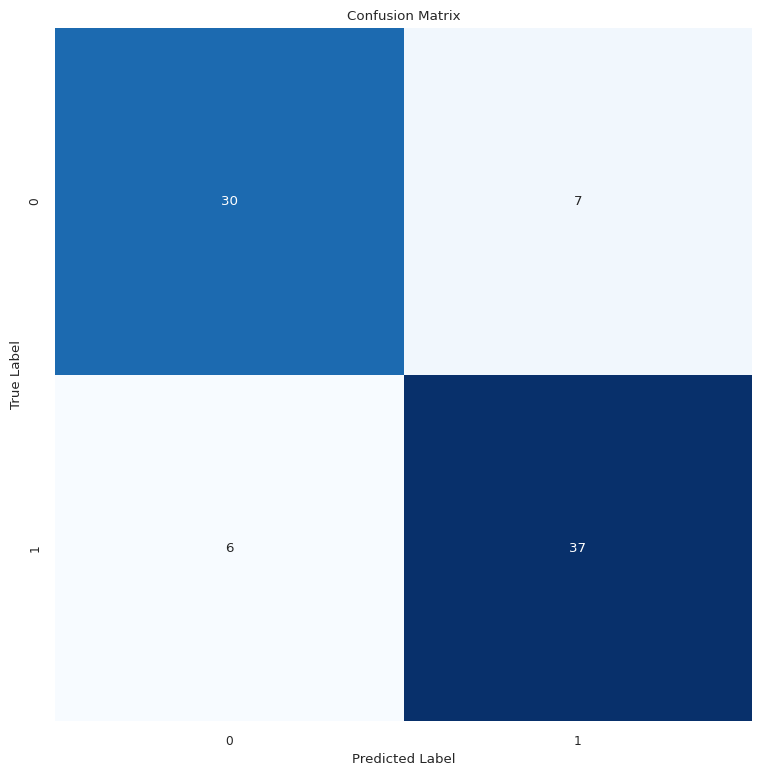

In [ ]:
matriz_confusão=metrics.confusion_matrix(ytest2, y_pred2)

plt.figure(figsize=(9,9))
sns.heatmap(matriz_confusão, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()